<a href="https://colab.research.google.com/github/LoveyThePigeon/Algorithms/blob/main/W9_Hoffman_Coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Huffman Codes:
a: 0010
b: 010
c: 1
d: 011
e: 000
f: 0011


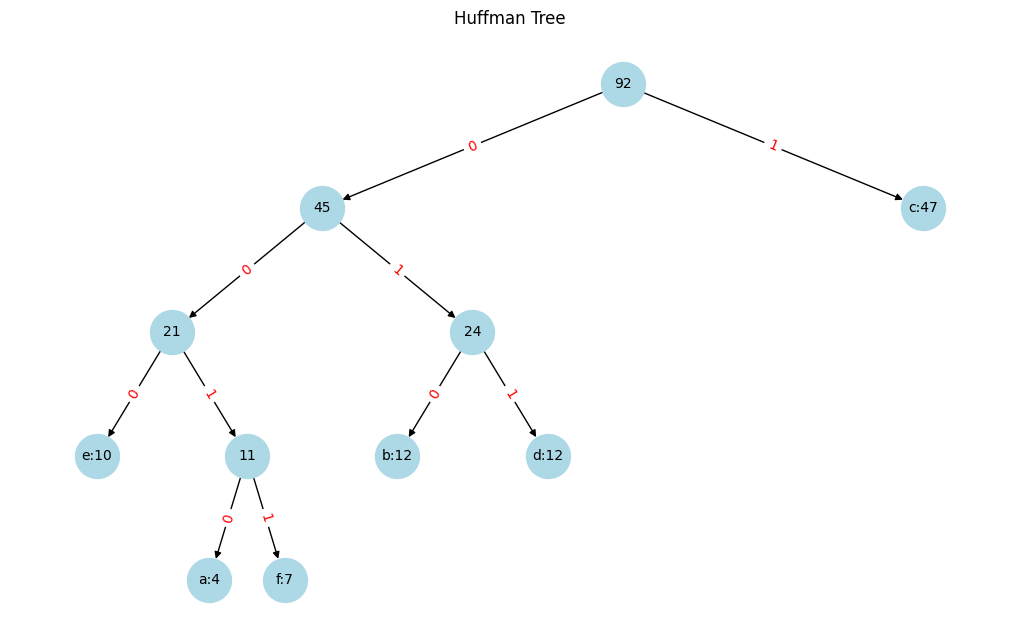

In [12]:
import heapq
import matplotlib.pyplot as plt
import networkx as nx

# Node class for Huffman Tree
class Node:
    def __init__(self, char, freq):
        self.char = char
        self.freq = freq
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.freq < other.freq

# Generate Huffman codes
def preOrder(root, codes, curr_code=""):
    if root is None:
        return
    if root.left is None and root.right is None:
        codes[root.char] = curr_code
        return
    preOrder(root.left, codes, curr_code + '0')
    preOrder(root.right, codes, curr_code + '1')

def huffmanCodes(chars, freq):
    pq = []
    for ch, fr in zip(chars, freq):
        heapq.heappush(pq, Node(ch, fr))

    while len(pq) > 1:
        l = heapq.heappop(pq)
        r = heapq.heappop(pq)
        merged = Node(None, l.freq + r.freq)
        merged.left = l
        merged.right = r
        heapq.heappush(pq, merged)

    root = pq[0]
    codes = {}
    preOrder(root, codes)
    return codes, root

# Draw Huffman tree using matplotlib and networkx
def draw_tree(root):
    G = nx.DiGraph()
    pos = {}
    labels = {}

    def add_edges(node, x=0, y=0, dx=1):
        if node is None:
            return
        node_id = id(node)
        pos[node_id] = (x, y)
        labels[node_id] = f"{node.char}:{node.freq}" if node.char else f"{node.freq}"
        if node.left:
            left_id = id(node.left)
            G.add_edge(node_id, left_id, label='0')
            add_edges(node.left, x - dx, y - 1, dx / 2)
        if node.right:
            right_id = id(node.right)
            G.add_edge(node_id, right_id, label='1')
            add_edges(node.right, x + dx, y - 1, dx / 2)

    add_edges(root)

    edge_labels = nx.get_edge_attributes(G, 'label')
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, labels=labels, node_size=1000, node_color='lightblue', font_size=10)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=10)
    plt.title("Huffman Tree")
    plt.axis('off')
    plt.show()

# Main
if __name__ == "__main__":
    chars = "abcdef"
    freq = [4, 12, 47, 12, 10, 7]

    codes, root = huffmanCodes(chars, freq)
    print("Huffman Codes:")
    for ch in chars:
        print(f"{ch}: {codes[ch]}")

    draw_tree(root)
